# Data Visualizations

This training module was developed by Dr. Kyle R. Roell, Lauren E. Koval, Alexis Payton, Dr. Elise Hickman, and Dr. Julia E. Rager

Spring 2023


## Introduction to Training Module
Visualizing data is an important step in any data analysis within environmental health research. Often, visualizations allow scientists to better understand trends and patterns within a particular dataset under evaluation. Even after statistical analysis of a dataset, it is important to then communicate these findings to a wide variety of target audiences. Visualizations are a vital part of communicating complex data and results to target audiences.

There are many ways to visualize data, from simple scatter plots to more complicated heat maps. The previous training module included some example visualization methods while evaluating basic trends in environmental health datasets. Here, we expand upon these methods by highlighting some that can be used to visualize larger, more high-dimensional datasets. This training module specifically reviews the formatting of data in preparation of generating visualizations, scaling datasets, and then guides users through the generation of the following example data visualizations:

+ Density plots
+ Boxplots
+ Correlation plots
+ Heat maps

These visualization approaches are demonstrated using a large environmental chemistry dataset. This example dataset was generated through chemical speciation analysis of smoke samples collected during lab-based simulations of wildfire events. Specifically, different biomass materials (eucalyptus, peat, pine, pine needles, and red oak) were burned under two combustion conditions of flaming and smoldering, resulting in the generation of 12 different smoke samples. These data have been previously published in the following environmental health research studies, with data made publicly available:

+ Rager JE, Clark J, Eaves LA, Avula V, Niehoff NM, Kim YH, Jaspers I, Gilmour MI. Mixtures modeling identifies chemical inducers versus repressors of toxicity associated with wildfire smoke. Sci Total Environ. 2021 Jun 25;775:145759. doi: 10.1016/j.scitotenv.2021.145759. Epub 2021 Feb 10. PMID: [33611182](https://pubmed.ncbi.nlm.nih.gov/33611182/).
+ Kim YH, Warren SH, Krantz QT, King C, Jaskot R, Preston WT, George BJ, Hays MD, Landis MS, Higuchi M, DeMarini DM, Gilmour MI. Mutagenicity and Lung Toxicity of Smoldering vs. Flaming Emissions from Various Biomass Fuels: Implications for Health Effects from Wildland Fires. Environ Health Perspect. 2018 Jan 24;126(1):017011. doi: 10.1289/EHP2200. PMID: [29373863](https://pubmed.ncbi.nlm.nih.gov/29373863/).

### GGplot

Ggplot is a powerful tool...

#### Additional Resources
+ 

### Script Preparations

#### Cleaning the global environment

In [1]:
rm(list=ls())

#### Installing required R packages
If you already have these packages installed, you can skip this step, or you can run the below code which checks installation status for you

In [2]:
if (!requireNamespace("GGally"))
  install.packages("GGally");

Loading required namespace: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



#### Loading R packages required for this session

In [3]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(corrplot)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




#### Set your working directory

In [ ]:
setwd("/filepath to where your input files are")

#### Importing example dataset
Then let's read in our example dataset. As mentioned in the introduction, this example dataset represents chemical measurements across 12 different biomass burn scenarios, representing potential wildfire events. Let's upload and view these data:

In [4]:
# Load the data
smoke_data <- read.csv("Module3_3/Module3_3_DataforVisualizations.csv")

# View the top of the dataset
head(smoke_data) 

,Chemical.Category,Chemical,CASRN,Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming,Units
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,n-Alkanes,2-Methylnonadecane,1560-86-7,0.06,0.06,1.36,0.06,0.06,0.06,0.06,0.06,0.06,0.13,ng_per_uL
2,n-Alkanes,3-Methylnonadecane,6418-45-7,0.04,0.04,1.13,0.90,0.47,0.04,0.04,0.72,0.04,0.77,ng_per_uL
3,n-Alkanes,Docosane,629-97-0,0.21,0.25,9.46,0.57,0.16,0.48,0.32,0.18,0.16,0.36,ng_per_uL
4,n-Alkanes,Dodecylcyclohexane,1795-17-1,0.04,0.04,0.25,0.04,0.04,0.04,0.12,0.04,0.04,0.04,ng_per_uL
5,n-Alkanes,Eicosane,112-95-8,0.11,0.25,7.55,0.54,0.17,0.29,0.28,0.16,0.15,0.38,ng_per_uL
6,n-Alkanes,Heneicosane,629-94-7,0.13,0.28,6.77,0.34,0.13,0.42,0.30,0.13,0.13,0.69,ng_per_uL


## Training Module's Environmental Health Questions
This training module was specifically developed to answer the following environmental health question:

1. How do the distributions of the chemical concentration data differ based on each biomass burn scenario?
2. Are there correlations between biomass burn conditions based on the chemical concentration data?
3. Under which biomass burn conditions, are concentrations of certain chemical categories the highest?

We can create a **density plot** to answer the first question. Similar to a histogram, density plots are an effective way to show overall distributions of data and can be useful to compare across various test conditions or other stratifications of the data.

In this example of a density plot, we'll visualize the distributions of chemical concentration data on the x axis. A density plot automatically displays where values are concentrated on the y axis. Additionally, we'll want to have multiple density plots within the same figure for each biomass burn condition. 

Before the data can be visualized, it needs to be converted from a wide to long format. This is because we need to have variable or column names entitled, `Chemical_Concentration` and `Biomass_Burn_Condition` that can be put into `ggplot`. For review on converting between long and wide formats and using other tidyverse tools, see [TAME Toolkit Module 2.3 for now](insert link).

In [5]:
longer_smoke_data = pivot_longer(smoke_data, cols = 4:13, names_to = "Biomass_Burn_Condition", 
                                 values_to = "Chemical_Concentration")

head(longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass_Burn_Condition,Chemical_Concentration
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Smoldering,0.06
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Flaming,0.06
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Smoldering,1.36
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Flaming,0.06
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Smoldering,0.06
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Flaming,0.06


#### Scaling dataframes for downstream data visualizations

A data preparation method that is commonly used to convert values into those that can be used to better illustrate overall data trends is **data scaling**. Scaling can be achieved through data transformations or normalization procedures, depending on the specific dataset and goal of analysis/visualization. Scaling is often carried out using data vectors or columns of a dataframe.

For this example, we will normalize the chemical concentration dataset using a basic scaling and centering procedure using the base R function, `scale`. This algorithm results in the normalization of a dataset using the mean value and standard deviation. This scaling step will convert chemical concentration values in our dataset into normalized values across samples, such that each chemical's concentration distributions are more easily comparable between the different biomass burn conditions.

For more information on the `scale` function, see its associated [RDocumentation](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/scale) and helpful tutorial on [Implementing the scale() function in R](https://www.journaldev.com/47818/r-scale-function).

In [6]:
scaled_longer_smoke_data = longer_smoke_data %>%
    # scaling within each chemical
    group_by(Chemical) %>%
    mutate(Scaled_Chemical_Concentration = scale(Chemical_Concentration)) %>%
    ungroup()

head(scaled_longer_smoke_data)

Chemical.Category,Chemical,CASRN,Units,Biomass_Burn_Condition,Chemical_Concentration,Scaled_Chemical_Concentration
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,"<dbl[,1]>"
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Eucalyptus_Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Smoldering,1.36,2.8419346
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Peat_Flaming,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Smoldering,0.06,-0.3347765
n-Alkanes,2-Methylnonadecane,1560-86-7,ng_per_uL,Pine_Flaming,0.06,-0.3347765


We can see that each chemical is now scaled, centered around 0, with values distributed that are less than zero, and others that are greater than zero, based off a normal distribution. 

Now that we have our dataset formatted, let's plot it.

## Density Plot Visualization
The following code can be used to generate a density plot:???

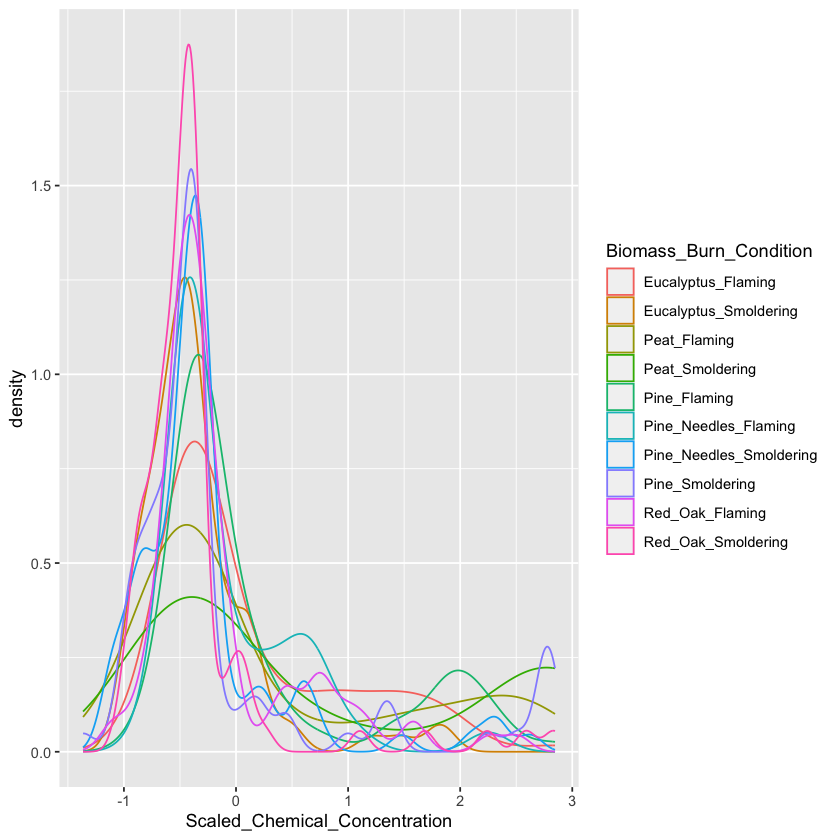

In [7]:
ggplot(scaled_longer_smoke_data, aes(x = Scaled_Chemical_Concentration, color = Biomass_Burn_Condition)) + 
  geom_density()

Here are some interesting takeaways from viewing this density plot:
+ In general, there are a high number of chemicals that were measured at relatively lower abundances (hence, the peak in occurrence density occurring towards the left, before 0)
+ The three conditions of smoldering peat, flaming peat, and flaming pine contained the most chemicals at the highest relative concentrations (hence, these lines are the top three lines towards the right)

## Boxplot Visualization
A **boxplot** can also be used to answer our first environmental health question: **How do the distributions of the chemical concentration data differ based on each biomass burn scenario?**. A boxplot also displays a data's distribution, but it incorporates a visualization of a five number summary (ie. minimum, first quartile, median, third quartile, and maximum). 

For this example, let's have `Scaled_Chemical_Concentration` on the x axis and `Biomass_Burn_Condition` on the y axis. The `scaled_longer_smoke_data` dataframe is the format we need, so we'll use that for plotting.


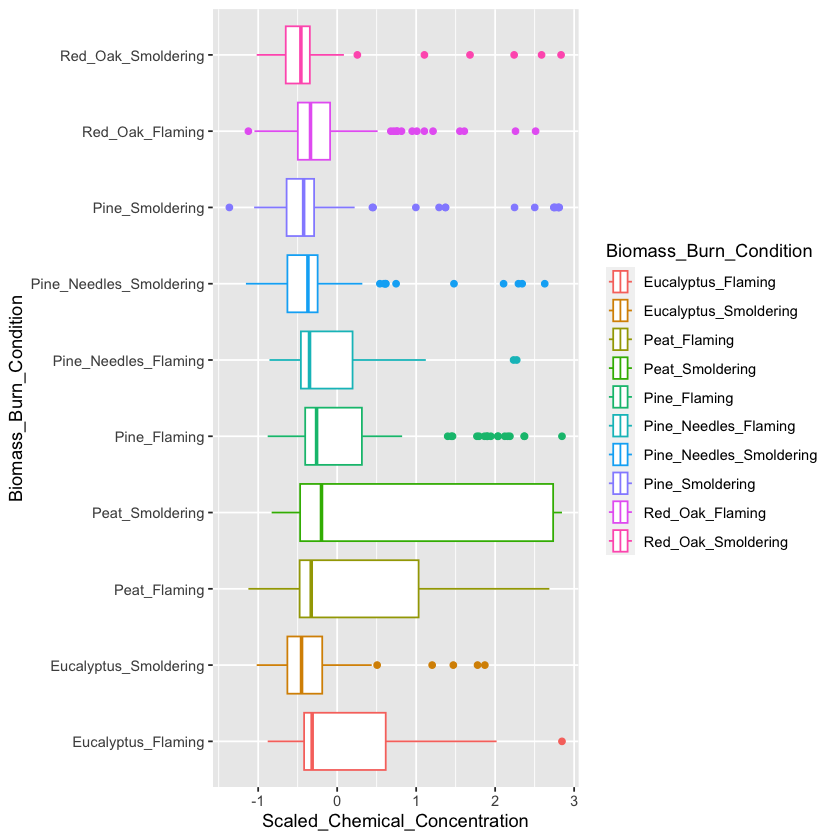

In [8]:
ggplot(scaled_longer_smoke_data, aes(x = Scaled_Chemical_Concentration, y = Biomass_Burn_Condition, 
                                     color = Biomass_Burn_Condition)) + 
  geom_boxplot()

Here are some interesting takeaways from viewing this box plot:
- The median chemical concentration is fairly low (less than 0) for all biomass burn conditions.
- In general, there isn't much variation in chemical concentrations with the exception of smoldering peat, flaming peat, and flaming eucalyptus

## Correlation Visualizations
Let's turn our attention to the second environmental health question: **Are there correlations between biomass burn conditions based on the chemical concentration data?** We'll use two different correlation visualizations to answer this question, using the `GGally` package. 

`GGally` is a package that serves as an extension of `ggplot2`, the baseline R plotting system based on the grammar of graphics. GGally is very useful for creating plots that compare groups or features within a dataset, among many other utilities. Here we will demonstrate the `ggpairs` function within `GGally` using the scaled chemistry dataset. This function will produce an image that shows correlation values between biomass burn sample pairs, and also illustrates the overall distributions of values in samples. For more information on GGally see its associated [RDocumentation](https://www.rdocumentation.org/packages/GGally/versions/1.5.0) and [example helpful tutorial](http://www.sthda.com/english/wiki/ggally-r-package-extension-to-ggplot2-for-correlation-matrix-and-survival-plots-r-software-and-data-visualization).

`GGally` requires a wide dataframe with ids (ie. `Chemical`) as the rows and the variables that will be compared to each other (ie. `Biomass_Burn_Condition`) as the columns. Let's create that dataframe.

In [9]:
# first selecting the chemical, biomass burn condition, and
# scaled chemical concentration columns
wide_scaled_data = scaled_longer_smoke_data %>%
    pivot_wider(id_cols = Chemical, names_from = "Biomass_Burn_Condition", 
                               values_from = "Scaled_Chemical_Concentration") %>%
    # converting the chemical names to row names
    column_to_rownames(var = "Chemical")

head(wide_scaled_data)

,Eucalyptus_Smoldering,Eucalyptus_Flaming,Peat_Smoldering,Peat_Flaming,Pine_Smoldering,Pine_Flaming,Pine_Needles_Smoldering,Pine_Needles_Flaming,Red_Oak_Smoldering,Red_Oak_Flaming
,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
2-Methylnonadecane,-0.3347765,-0.3347765,2.841935,-0.3347765,-0.3347765,-0.3347765,-0.3347765,-0.3347765,-0.3347765,-0.1637228
3-Methylnonadecane,-0.8794448,-0.8794448,1.649829,1.1161291,0.1183422,-0.8794448,-0.8794448,0.6984509,-0.8794448,0.8144726
Docosane,-0.3465132,-0.3327216,2.842787,-0.2223890,-0.3637526,-0.2534201,-0.3085863,-0.3568568,-0.3637526,-0.2947948
Dodecylcyclohexane,-0.4240624,-0.4240624,2.646734,-0.4240624,-0.4240624,-0.4240624,0.7457649,-0.4240624,-0.4240624,-0.4240624
Eicosane,-0.3802202,-0.3195928,2.841691,-0.1940076,-0.3542370,-0.3022707,-0.3066012,-0.3585675,-0.3628981,-0.2632960
Heneicosane,-0.3895328,-0.3166775,2.835527,-0.2875354,-0.3895328,-0.2486793,-0.3069635,-0.3895328,-0.3895328,-0.1175398


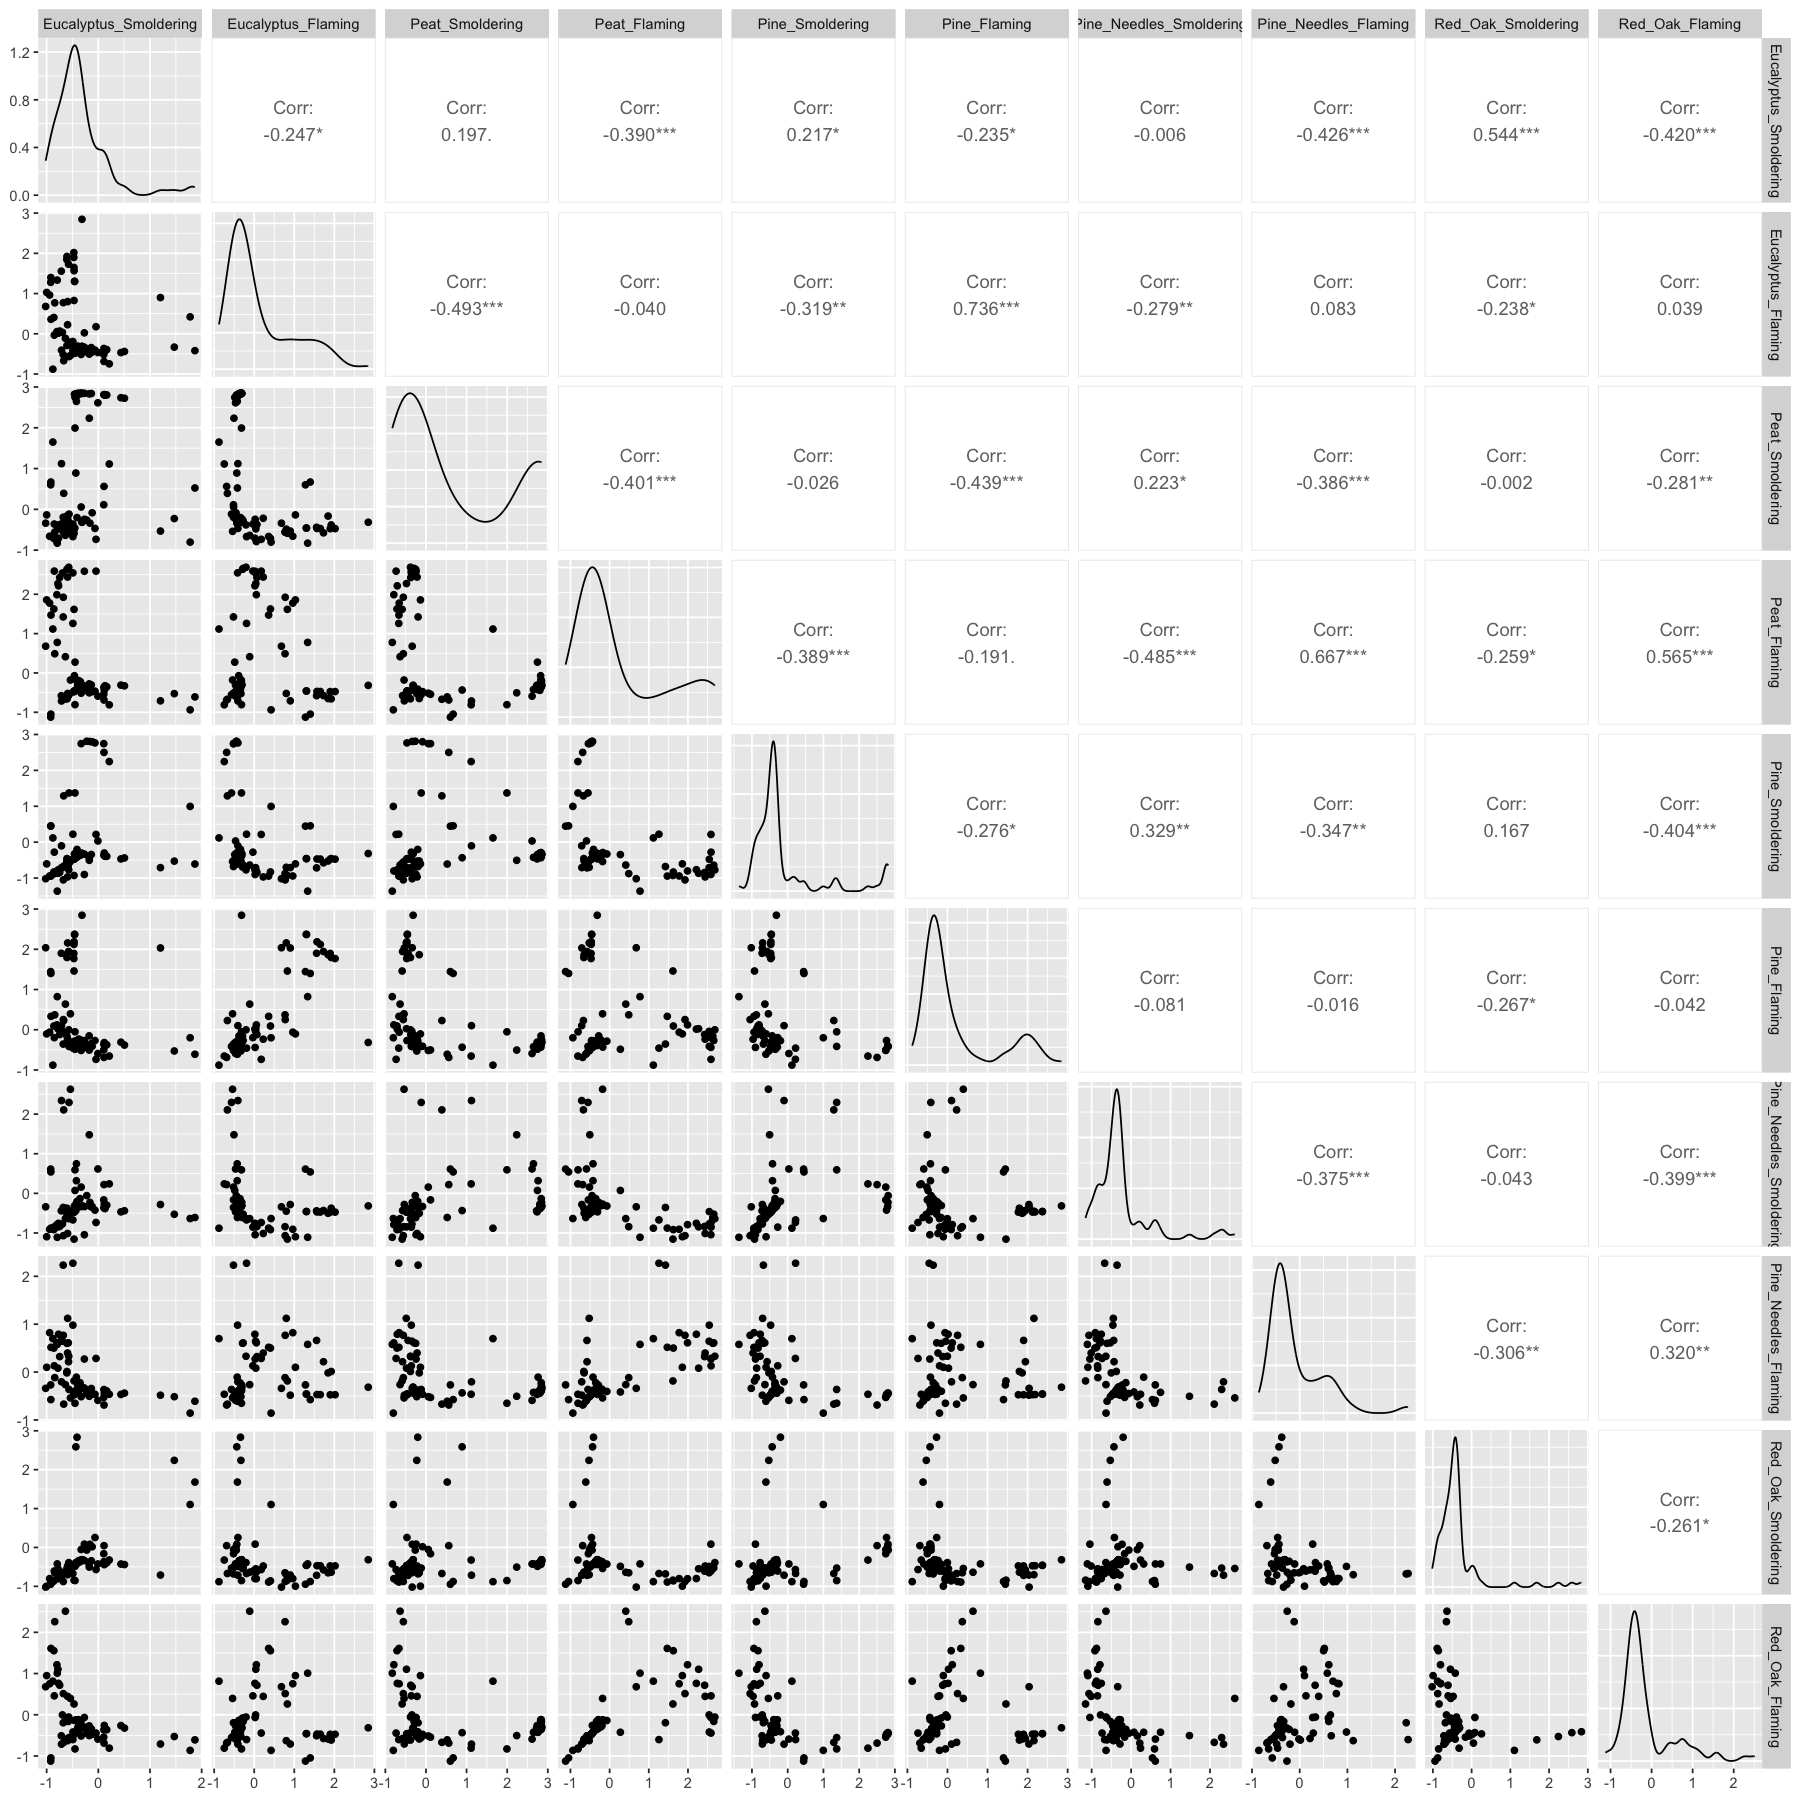

In [10]:
# changing size of the plot to view the variables easier
options(repr.plot.width = 15, repr.plot.height = 15)
ggpairs(data.frame(as.matrix(wide_scaled_data)))

Takeaway from this....ADD WORDS!!!!!!

Many of these biomass burn conditions have significant correlations denoted by the asterisks.
- '*': p value < 0.1
- '**': p value < 0.05
- '***': p value < 0.01

The diagonal shows the density plots for each variable. The lower left portion visualizes the values of each of two variables compared.

Using the other function from `GGally`, `ggcorr` visualizes each correlation as a square.

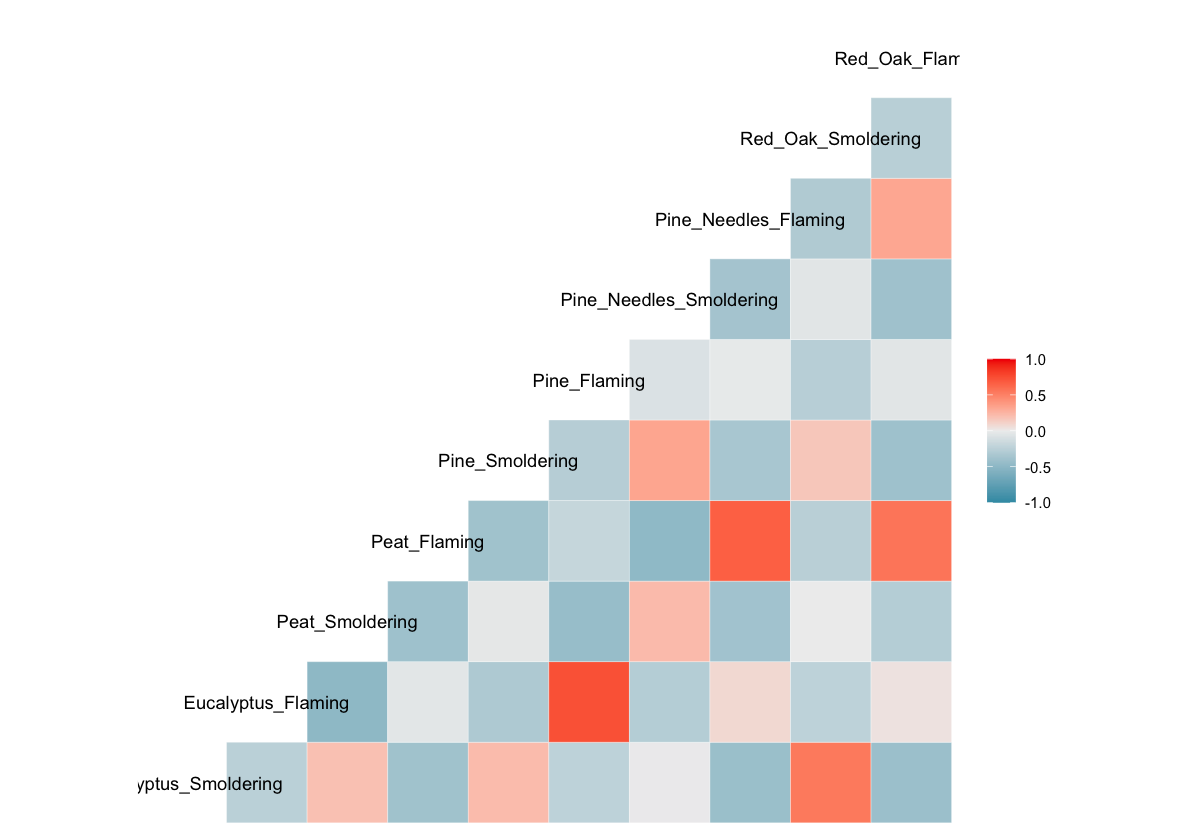

In [11]:
options(repr.plot.width = 10, repr.plot.height = 7)
ggcorr(wide_scaled_data)

Takeaways from this....ADD WORDS!!!
CAN YOU PROVIDE A SHORT PARAGRAPH OR A FEW SENTENCES HERE DISCUSSING THE CORRPLOT PACKAGE SINCE IT'S EQUALLY IF NOT MORE POPULAR THAN GGALLY (I THINK? :))? AND THEN MAYBE A LINK TO A TUTORIAL OR VIGNETTE?

## Heat Map Visualization

Last, we'll turn our attention to answering the final environmental health question: **Under which biomass burn conditions, are concentrations of certain chemical categories the highest?** This can be addressed with the help of a heat map.

**Heat maps** are a highly effective method of viewing an entire dataset at once. Heat maps can appear similar to correlation plots, but typically illustrate other values (e.g., concentrations, expression levels, presence/absence, etc) besides correlation values.

For this example, we can plot `Biomass_Burn_Condition` and `Chemical.Category` on the axes and fill in the values with `Scaled_Chemical_Concentration`. When generating heat maps, scaled values can be used to better distinguish patterns between groups/samples. 

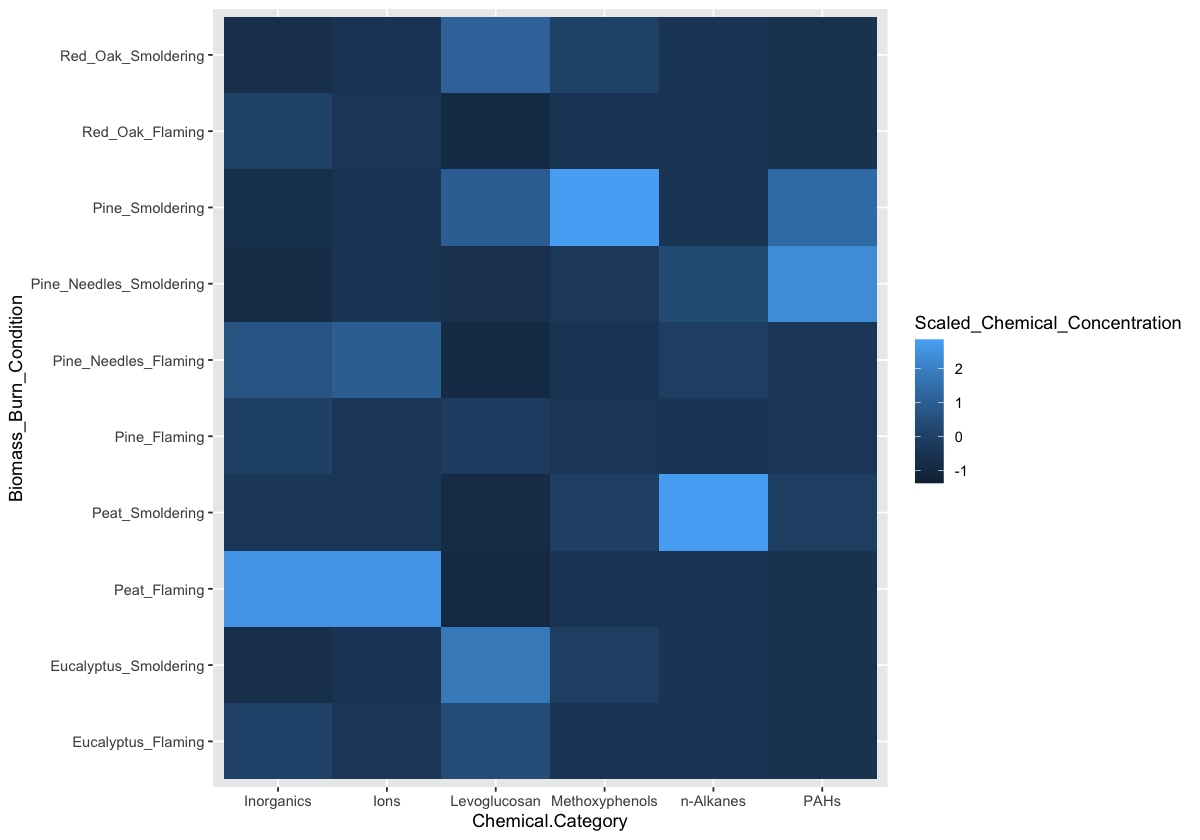

In [12]:
ggplot(data = scaled_longer_smoke_data, aes(x = Chemical.Category, y = Biomass_Burn_Condition,
                                           fill = Scaled_Chemical_Concentration)) + 
  geom_tile()

From this heat map, we can see that...
- Pine smoldering has high concentrations of Methoxyphenols
- Pine needles smoldering has high concentrations of PAHs
- Peat smoldering has high concentrations of n-Alkanes
- Peat flaming has high concentrations of inorganics and ions

CAN YOU ADD LINKS HERE TO PHEATMAP AND COMPLEX HEATMAP AS ALTERNATIVE HEATMAP PACKAGES?
## Scatter Plot with a Line of Best Fit Visualization
**Used a different dataset to have a better scatter plot.

In [13]:
# Load data
demographic_data = read.csv("Module3_3/Module3_3_DemographicData.csv")
chemical_data    = read.csv("Module3_3/Module3_3_ChemicalData.csv")

full.data <- merge(demographic_data, chemical_data, by = "ID") 
head(full.data)

,ID,BMI,MAge,MEdu,BW,GA,DWAs,DWCd,DWCr,UAs,UCd,UCr
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,27.7,22.99928,3,3180.058,34,6.426464,1.292941,51.67987,10.192695,0.7537104,42.60187
2,2,26.8,30.05142,3,3210.823,43,7.832384,1.798535,50.10409,11.815088,0.9789506,41.30757
3,3,33.2,28.04660,3,3311.551,40,7.516569,1.288461,48.74001,10.079057,0.1903262,36.47716
4,4,30.1,34.81796,3,3266.844,32,5.906656,2.075259,50.92745,8.719123,0.9364825,42.47987
5,5,37.4,42.68440,3,3664.088,35,7.181873,2.762643,55.16882,9.436559,1.4977829,47.78528
6,6,33.3,24.94960,3,3328.988,40,9.723429,3.054057,51.14812,11.589403,1.6645837,38.26386


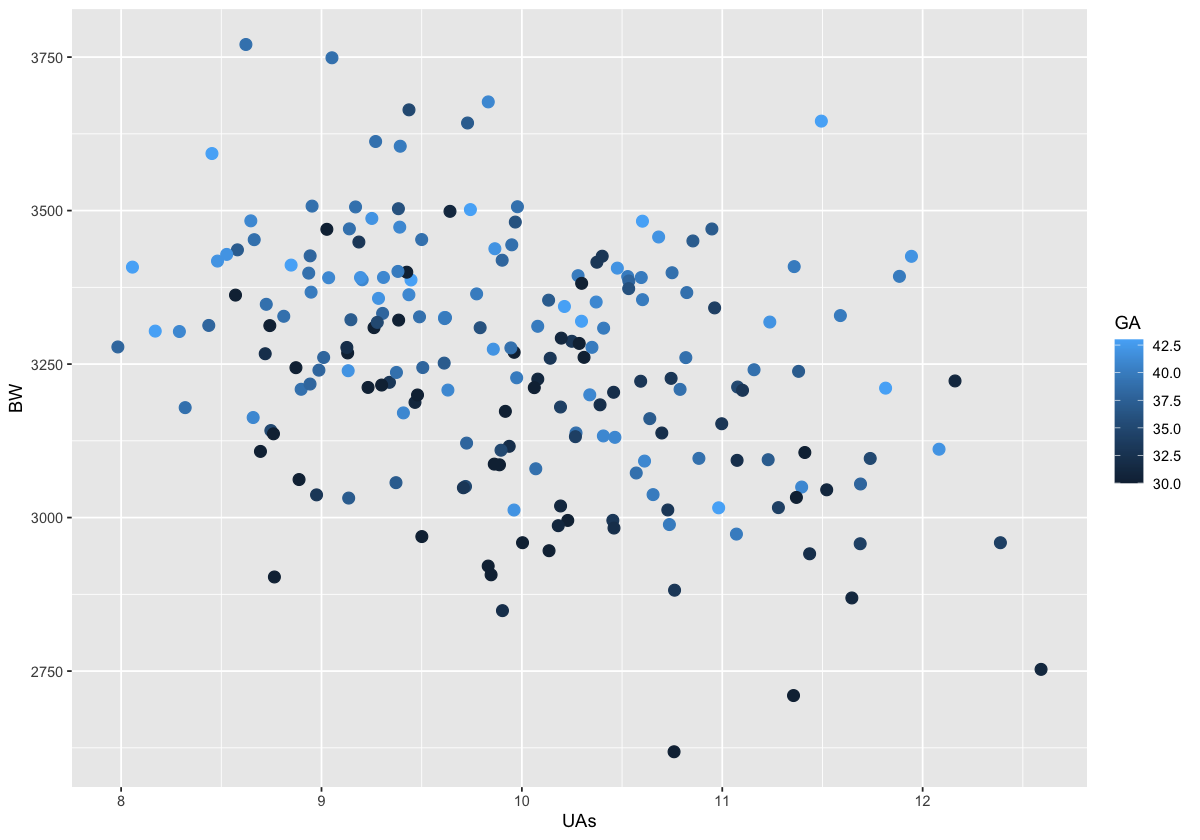

In [15]:
ggplot(full.data, aes(x = UAs, y = BW, color = GA), size = 3) + 
  geom_point()

# talk about difference between putting a parameter inside or outside of 'aes'

ADD WORDS.

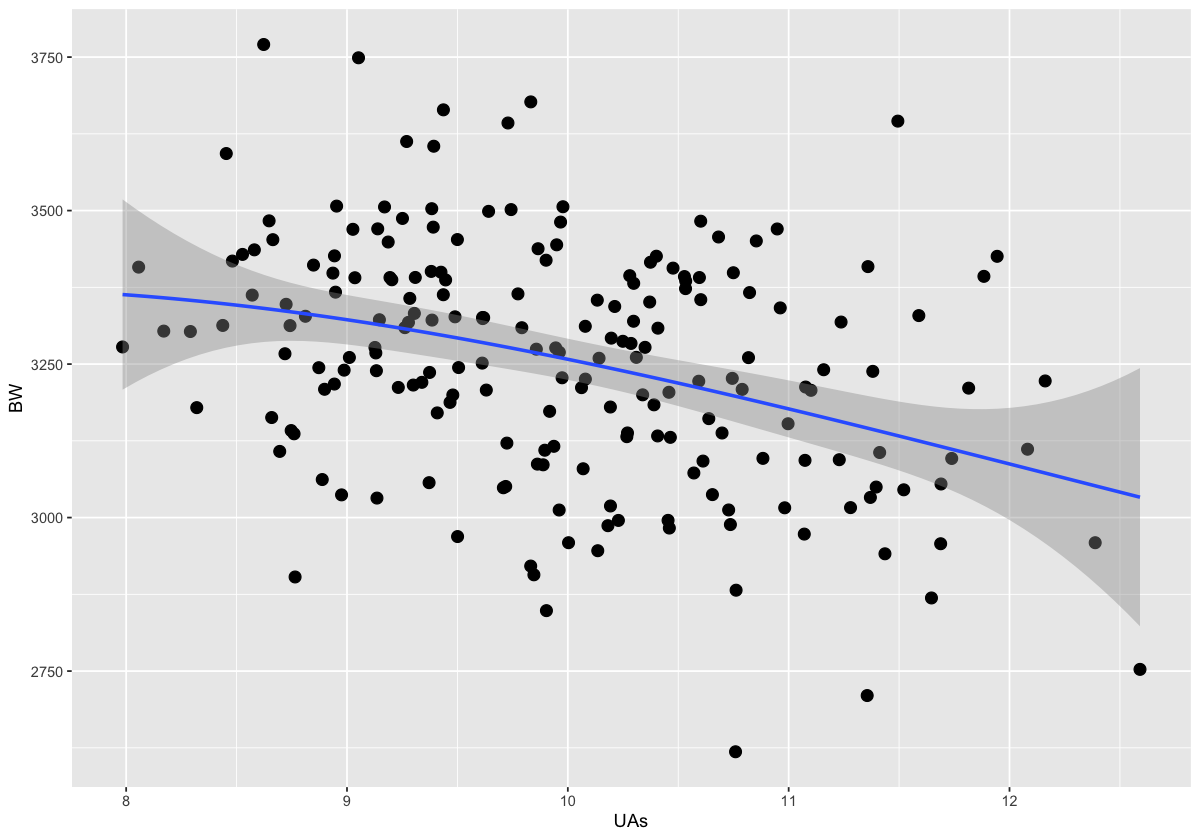

In [19]:
ggplot(full.data, aes(x = UAs, y = BW,)) + 
  geom_point(size = 3) + 
  geom_smooth(method = lm, formula = y ~ splines::bs(x, 3))

Further documentation on [`geom_smooth()`](https://www.sharpsightlabs.com/blog/geom_smooth/).

## Test Your Knowledge
Replicate the figure below! The heat map visualizes each burn condition separately, allowing us to determine if the concentrations of chemicals released are contingent upon the burn condition.

For additional figures available and to view aspects of figures that can be changed in `GGplot2` check out this [GGPlot2 Cheat Sheet](https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf). You might need it to make this figure!

**Hint 1**: Use the `separate` function from `tidyverse` to split `Biomass_Burn_Condition` into `Biomass` and `Burn_Condition`. 

**Hint 2**: Use the function `facet_wrap` within `ggplot` to seperate the heat maps by `Burn_Condition`.

<img src="Module3_3/Module3_3_TYK_figure.png"  />